### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [1]:
import tensorflow as tf
import numpy as np
import keras

tf.reset_default_graph()
tf.set_random_seed(42)

Using TensorFlow backend.


#### Collect Fashion mnist data from tf.keras.datasets 

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print ("x_train length: ", len(x_train))
print ("y_train length: ", len(y_train))
print ("x_train shape: ", x_train.shape)
print ("y_train shape: ", y_train.shape)

x_train length:  60000
y_train length:  60000
x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)


In [4]:
print ("x_test length: ", len(x_test))
print ("y_test length: ", len(y_test))
print ("x_test shape: ", x_test.shape)
print ("y_test shape: ", y_test.shape)

x_test length:  10000
y_test length:  10000
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


#### Change train and test labels into one-hot vectors

In [5]:
print ("y_train, before one hot vectors conversion")
y_train[0:5]

y_train, before one hot vectors conversion


array([9, 0, 0, 3, 0], dtype=uint8)

In [0]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [7]:
print ("y_train, after one hot vectors conversion")
y_train[0:5,:]

y_train, after one hot vectors conversion


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

#### Build the Graph

#### Initialize model, reshape & normalize data

In [8]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

Instructions for updating:
Colocations handled automatically by placer.


#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [9]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

#dropout layer
model.add(tf.keras.layers.Dropout(0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [0]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Store Training Results
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

model.fit(x_train,y_train,          
          validation_data=(x_test,y_test),
          epochs=30,
          batch_size=20, callbacks=callback_list)

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
60000/60000 [==============================] - 19s 309us/sample - loss: 0.5332 - acc: 0.8096 - val_loss: 0.4118 - val_acc: 0.8469
Epoch 2/30
60000/60000 [==============================] - 17s 291us/sample - loss: 0.4166 - acc: 0.8494 - val_loss: 0.4180 - val_acc: 0.8509
Epoch 3/30
60000/60000 [==============================] - 17s 291us/sample - loss: 0.3828 - acc: 0.8605 - val_loss: 0.3744 - val_acc: 0.8677
Epoch 4/30
60000/60000 [==============================] - 17s 290us/sample - loss: 0.3564 - acc: 0.8700 - val_loss: 0.3725 - val_acc: 0.8715
Epoch 5/30
60000/60000 [==============================] - 17s 289us/sample - loss: 0.3340 - acc: 0.8781 - val_loss: 0.3839 - val_acc: 0.8687
Epoch 6/30
60000/60000 [==============================] - 18s 292us/sample - loss: 0.3221 - acc: 0.8807 - val_loss: 0.3785 - val_acc: 0.8690
Epoch 7/30
60000/60000 [==============================] 

In [12]:
loss_and_metrics = model.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 64us/sample - loss: 0.3944 - acc: 0.8859
[0.3944348197102547, 0.8859]


In [13]:

print ("Final Train Accuracy from model history: ", model.history.history['acc'][-1])
print ("Final Test Accuracy from model history: ", model.history.history['val_acc'][-1])

Final Train Accuracy from model history:  0.9181333
Final Test Accuracy from model history:  0.8859


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


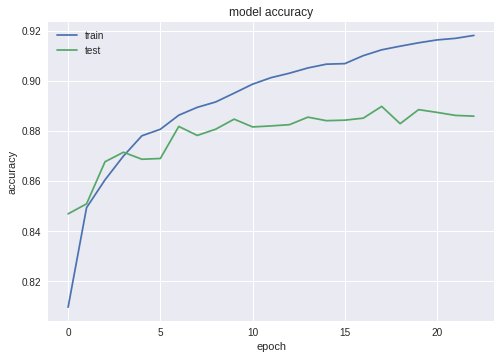

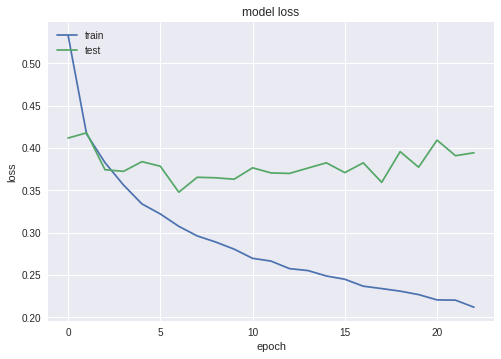

In [14]:
import matplotlib.pyplot as plt

# list all data in history
print(model.history.history.keys())
# summarize history for accuracy
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Word Embeddings in Python with Gensim

In this, you will practice how to train and load word embedding models for natural language processing applications in Python using Gensim.


1. How to train your own word2vec word embedding model on text data.
2. How to visualize a trained word embedding model using Principal Component Analysis.
3. How to load pre-trained word2vec word embedding models.

### Run the below two commands to install gensim and the wiki dataset

In [1]:
!pip3 install --upgrade gensim --user

Requirement already up-to-date: gensim in /root/.local/lib/python3.6/site-packages (3.7.1)


In [2]:
!pip3 install wikipedia --user

### Import gensim

In [0]:
import gensim

### Obtain Text

Import search and page functions from wikipedia module
search(/key word/): search function takes keyword as argument and gives top 10 article titles matching the given keyword.

page(/title of article/): page function takes page title as argument and gives content in the output.

In [0]:
## Usage: 
from wikipedia import search, page
titles = search("Machine Learning")

In [40]:
len(titles)

10

### Print the top 10 titles for the keyword `Machine Learning`

In [41]:
print ("Top 10 titles for the keyword: Machine Learning")
titles[:10]

Top 10 titles for the keyword: Machine Learning


['Machine learning',
 'Active learning (machine learning)',
 'Deep learning',
 'Boosting (machine learning)',
 'List of datasets for machine learning research',
 'Support-vector machine',
 'Adversarial machine learning',
 'Outline of machine learning',
 'Weka (machine learning)',
 'Learning']

### Get the content from the first title from the above obtained 10 titles.

In [42]:
wikipage = page(titles[0])
content = wikipage.content
content

'Machine learning (ML) is the scientific study of algorithms and statistical models that computer systems use to effectively perform a specific task without using explicit instructions, relying on patterns and inference instead. It is seen as a subset of artificial intelligence. Machine learning algorithms build a mathematical model of sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task. Machine learning algorithms are used in the applications of email filtering, detection of network intruders, and computer vision, where it is infeasible to develop an algorithm of specific instructions for performing the task. Machine learning is closely related to computational statistics, which focuses on making predictions using computers. The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a field of study within machine learning, 

### Create a list with name `documents` and append all the words in the 10 pages' content using the above 10 titles.

In [0]:
import re, string

def clean_str(string):
  """
  String cleaning before vectorization
  """
  try:    
    string = re.sub(r'^https?:\/\/<>.*[\r\n]*', '', string, flags=re.MULTILINE)
    string = re.sub(r"[^A-Za-z]", " ", string)         
    words = string.strip().lower().split()    
    words = [w for w in words if len(w)>=1]
    return " ".join(words)	
  except:
    return ""

In [0]:
Top10Contents = []
for i in range(10):
  Top10Contents.append(clean_str(page(titles[i]).content))

In [0]:
documents = []
for content in Top10Contents:
  documents.append(content.split(' '))

In [46]:
print ('Document size: ', len(documents))
print ('Document list 1:')
print (documents[0])

Document size:  10
Document list 1:
['machine', 'learning', 'ml', 'is', 'the', 'scientific', 'study', 'of', 'algorithms', 'and', 'statistical', 'models', 'that', 'computer', 'systems', 'use', 'to', 'effectively', 'perform', 'a', 'specific', 'task', 'without', 'using', 'explicit', 'instructions', 'relying', 'on', 'patterns', 'and', 'inference', 'instead', 'it', 'is', 'seen', 'as', 'a', 'subset', 'of', 'artificial', 'intelligence', 'machine', 'learning', 'algorithms', 'build', 'a', 'mathematical', 'model', 'of', 'sample', 'data', 'known', 'as', 'training', 'data', 'in', 'order', 'to', 'make', 'predictions', 'or', 'decisions', 'without', 'being', 'explicitly', 'programmed', 'to', 'perform', 'the', 'task', 'machine', 'learning', 'algorithms', 'are', 'used', 'in', 'the', 'applications', 'of', 'email', 'filtering', 'detection', 'of', 'network', 'intruders', 'and', 'computer', 'vision', 'where', 'it', 'is', 'infeasible', 'to', 'develop', 'an', 'algorithm', 'of', 'specific', 'instructions', 'f

### Build the gensim model for word2vec with by considering all the words with frequency >=1 with embedding size=50

In [0]:
#Build the model
model = gensim.models.Word2Vec(documents, #Word list
                               min_count=1, #Ignore all words with total frequency lower than this                           
                               workers=4, #Number of CPUs
                               size=50,  #Embedding size
                               window=5, #Maximum Distance between current and predicted word
                               iter=10   #Number of iterations over the text corpus
                              )  

### Exploring the model

In [48]:
# Vocablury of the model
model.wv.vocab

{'machine': <gensim.models.keyedvectors.Vocab at 0x7f588a1810b8>,
 'learning': <gensim.models.keyedvectors.Vocab at 0x7f588a1810f0>,
 'ml': <gensim.models.keyedvectors.Vocab at 0x7f588a181198>,
 'is': <gensim.models.keyedvectors.Vocab at 0x7f588a1811d0>,
 'the': <gensim.models.keyedvectors.Vocab at 0x7f588a181208>,
 'scientific': <gensim.models.keyedvectors.Vocab at 0x7f588a181240>,
 'study': <gensim.models.keyedvectors.Vocab at 0x7f588a181278>,
 'of': <gensim.models.keyedvectors.Vocab at 0x7f588a1812b0>,
 'algorithms': <gensim.models.keyedvectors.Vocab at 0x7f588a1812e8>,
 'and': <gensim.models.keyedvectors.Vocab at 0x7f588a181320>,
 'statistical': <gensim.models.keyedvectors.Vocab at 0x7f588a181358>,
 'models': <gensim.models.keyedvectors.Vocab at 0x7f588a181390>,
 'that': <gensim.models.keyedvectors.Vocab at 0x7f588a1813c8>,
 'computer': <gensim.models.keyedvectors.Vocab at 0x7f588a181400>,
 'systems': <gensim.models.keyedvectors.Vocab at 0x7f588a181438>,
 'use': <gensim.models.keye

#### Check how many words in the model

In [49]:
#Model size
model.wv.syn0.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


(4996, 50)

### Get an embedding for word `SVM`

In [50]:
model.wv['svm']

array([-0.83479697, -1.0956173 ,  0.49708685,  0.01679089,  0.24108155,
       -0.23685831,  0.16244337, -0.21043889,  0.01642192,  1.3256817 ,
       -0.5154674 ,  0.6789963 , -0.09419567, -0.23661165, -0.7237646 ,
        1.210399  ,  0.89158136,  0.0337528 ,  0.17818195,  0.87802434,
       -1.2656181 ,  1.0328531 ,  0.24038716, -0.02888263,  0.10000168,
        0.62167346, -0.6023344 ,  1.1827984 ,  0.15133125,  0.5801356 ,
        1.4098152 , -1.0969948 , -0.69780475, -0.6365832 , -0.47077477,
        0.5056433 , -0.5247746 ,  0.0200081 , -0.03073768,  0.3999764 ,
        0.21331973, -0.05504226, -0.34069657, -0.5036934 ,  0.9703856 ,
       -0.4733235 , -0.08489975, -1.0589607 ,  1.2543991 , -0.49714234],
      dtype=float32)

### Finding most similar words for word `learning`

In [51]:
model.wv.most_similar('learning')

[('deep', 0.9981350898742676),
 ('supervised', 0.9977611899375916),
 ('machine', 0.9975079298019409),
 ('neural', 0.996361494064331),
 ('algorithms', 0.9961397051811218),
 ('networks', 0.9959055781364441),
 ('comparison', 0.9957601428031921),
 ('belief', 0.9935668706893921),
 ('variety', 0.9930397868156433),
 ('feedforward', 0.9920217990875244)]

### Find the word which is not like others from `machine, svm, ball, learning`

In [52]:
model.doesnt_match("machine, svm, ball, learning".split(', '))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.


'ball'

### Save the model with name `word2vec-wiki-10`

In [0]:
model.save('word2vec-wiki-10')

### Load the model `word2vec-wiki-10`

In [0]:
#Load model from memory
model = gensim.models.Word2Vec.load('word2vec-wiki-10')